## About this Dataset
+ Context

When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision regarding whether to go ahead with the loan approval or not. Two types of risks are associated with the bank’s decision."

"If the applicant is a good credit risk, i.e. is likely to repay the loan, then not approving the loan to the person results in a loss of business to the bank
If the applicant is a bad credit risk, i.e. is not likely to repay the loan, then approving the loan to the person results in a financial loss to the bank."

The predictors that may potentially have any influence on Creditability:

+ Account Balance: No account (1), None (No balance) (2), Some Balance (3)

+ Payment Status: Some Problems (1), Paid Up (2), No Problems (in this bank) (3)

+ Savings/Stock Value: None, Below 100 DM, [100, 1000] DM, Above 1000 DM

+ Employment Length: Below 1 year (including unemployed), [1, 4), [4, 7), Above 7

+ Sex/Marital Status: Male Divorced/Single, Male Married/Widowed, Female

+ No of Credits at this bank: 1, More than 1

+ Guarantor: None, Yes

+ Concurrent Credits: Other Banks or Dept Stores, None

+ ForeignWorker variable may be dropped from the study

+ Purpose of Credit: New car, Used car, Home Related, Other

https://online.stat.psu.edu/stat508/resource/analysis/gcd

Content

The German Credit Data contains data on 20 variables and the classification whether an applicant is considered a Good or a Bad credit risk for 1000 loan applicants. A predictive model developed on this data is expected to provide a bank manager guidance for making a decision whether to approve a loan to a prospective applicant based on his/her profiles.

Acknowledgements
https://online.stat.psu.edu/stat508/resource/analysis/gcd

Photo by Alice Pasqual on Unsplash

Inspiration
Unemployment in time of crisis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data and EDA

In [2]:
data = pd.read_csv('german.csv', sep=';')
data.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [3]:
data.shape

(1000, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_Amount                      1000 non-null   int64
 6   Value_Savings_Stocks               1000 non-null   int64
 7   Length_of_current_employment       1000 non-null   int64
 8   Instalment_per_cent                1000 non-null   int64
 9   Sex_Marital_Status                 1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_Current_address        1000 non-null   int64
 12  Most_valuable_availab

In [5]:
data.Creditability.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

<AxesSubplot:>

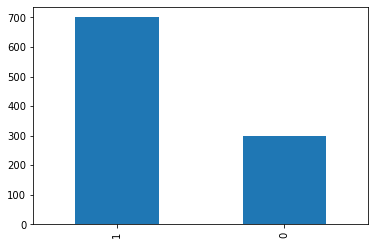

In [6]:
data.Creditability.value_counts().plot(kind = 'bar')

In [7]:
data.isnull().sum()

Creditability                        0
Account_Balance                      0
Duration_of_Credit_monthly           0
Payment_Status_of_Previous_Credit    0
Purpose                              0
Credit_Amount                        0
Value_Savings_Stocks                 0
Length_of_current_employment         0
Instalment_per_cent                  0
Sex_Marital_Status                   0
Guarantors                           0
Duration_in_Current_address          0
Most_valuable_available_asset        0
Age_years                            0
Concurrent_Credits                   0
Type_of_apartment                    0
No_of_Credits_at_this_Bank           0
Occupation                           0
No_of_dependents                     0
Telephone                            0
Foreign_Worker                       0
dtype: int64

In [8]:
# Target
y = data.Creditability

# Features
X = data.drop('Creditability', axis = 1)

In [9]:
features = X.columns
features

Index(['Account_Balance', 'Duration_of_Credit_monthly',
       'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
       'Value_Savings_Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors',
       'Duration_in_Current_address', 'Most_valuable_available_asset',
       'Age_years', 'Concurrent_Credits', 'Type_of_apartment',
       'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents',
       'Telephone', 'Foreign_Worker'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

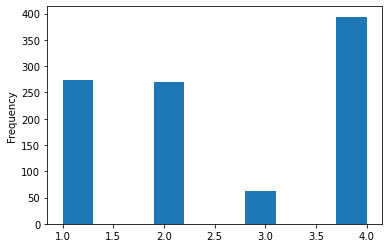

In [10]:
X.Account_Balance.plot(kind = 'hist')

In [11]:
X['Account_Balance'].value_counts()

4    394
1    274
2    269
3     63
Name: Account_Balance, dtype: int64

In [12]:
tran_acc_bal = X['Account_Balance'].value_counts() / len(X) * 100
tran_acc_bal

4    39.4
1    27.4
2    26.9
3     6.3
Name: Account_Balance, dtype: float64

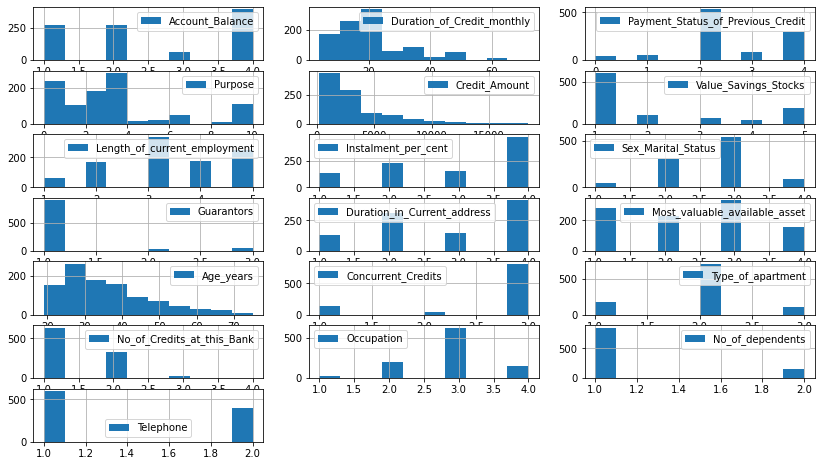

In [13]:
plt.figure(figsize = (14, 8))
for i, j in zip(range(1, 20), features):
    
    plt.subplot(7, 3, i)
    
    X[j].hist(label = j)
    
    plt.legend()

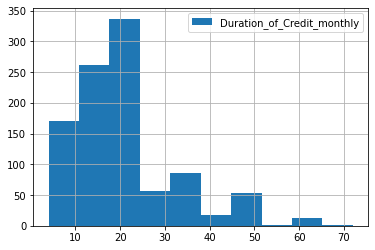

In [14]:
X['Duration_of_Credit_monthly'].hist(label = features[1])
plt.legend()

In [15]:
X['Payment_Status_of_Previous_Credit'].value_counts()

2    530
4    293
3     88
1     49
0     40
Name: Payment_Status_of_Previous_Credit, dtype: int64

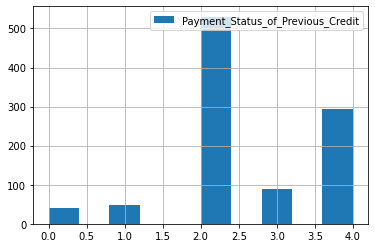

In [16]:
X['Payment_Status_of_Previous_Credit'].hist(label = [features[2]])
plt.legend()

In [17]:
X['Purpose'].value_counts()

3     280
0     234
2     181
1     103
9      97
6      50
5      22
4      12
10     12
8       9
Name: Purpose, dtype: int64

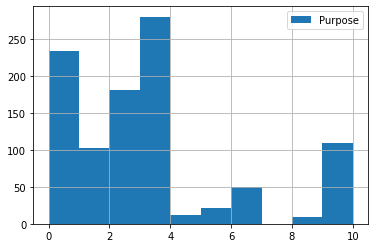

In [18]:
X['Purpose'].hist(label = features[3])
plt.legend()

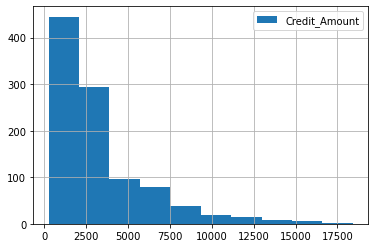

In [19]:
X['Credit_Amount'].hist(label = features[4])
plt.legend()

In [20]:
X['Credit_Amount'].describe()

count     1000.00000
mean      3271.24800
std       2822.75176
min        250.00000
25%       1365.50000
50%       2319.50000
75%       3972.25000
max      18424.00000
Name: Credit_Amount, dtype: float64

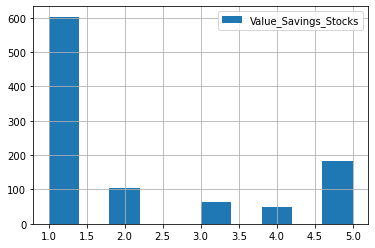

In [21]:
X['Value_Savings_Stocks'].hist(label = features[5])
plt.legend()

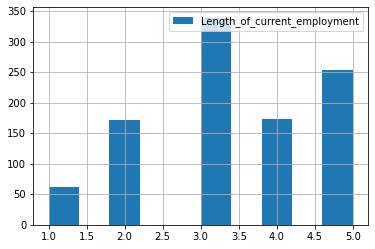

In [22]:
X['Length_of_current_employment'].hist(label = features[6])
plt.legend()

<AxesSubplot:>

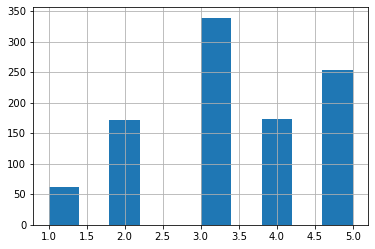

In [23]:
X['Length_of_current_employment'].hist(label = 'Length_of_current_employment')

<AxesSubplot:>

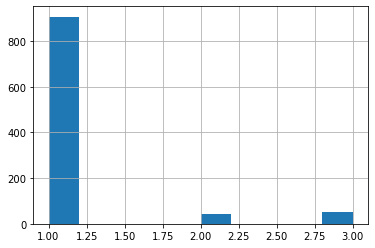

In [24]:
X['Guarantors'].hist(label = 'Guarantors')

<AxesSubplot:>

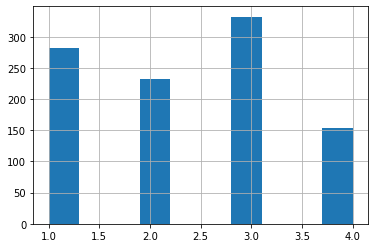

In [25]:
X['Most_valuable_available_asset'].hist(label = 'Most_valuable_available_asset')

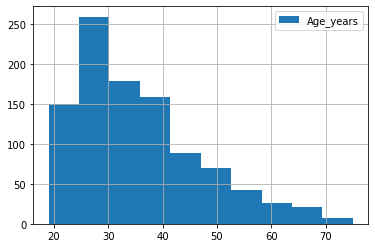

In [26]:
X['Age_years'].hist(label = 'Age_years')
plt.legend()

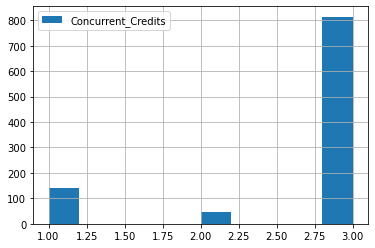

In [27]:
X['Concurrent_Credits'].hist(label = 'Concurrent_Credits')
plt.legend()

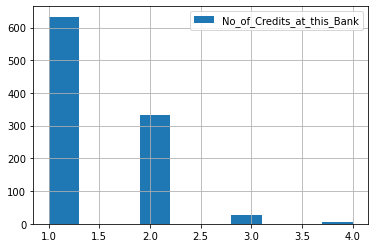

In [28]:
X['No_of_Credits_at_this_Bank'].hist(label = 'No_of_Credits_at_this_Bank')
plt.legend()

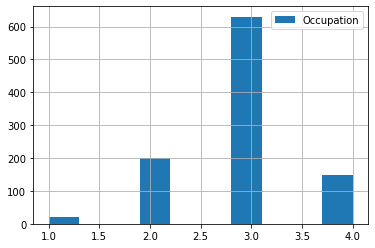

In [29]:
X['Occupation'].hist(label = 'Occupation')
plt.legend()

<AxesSubplot:xlabel='Age_years', ylabel='Credit_Amount'>

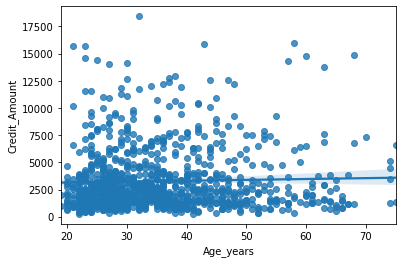

In [30]:
sns.regplot(x = X['Age_years'], y = X['Credit_Amount'])

## Predictive Modelling

In [31]:
# Tree-based
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# LogisticRegression
from sklearn.linear_model import LogisticRegression

# Distance-based
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Model Validation
from sklearn import metrics

In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

+ ## DecisionTree

In [33]:
model_dt = DecisionTreeClassifier(random_state = 0)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [34]:
preds_dt = model_dt.predict(X_valid)
acc_score = metrics.accuracy_score(y_valid, preds_dt)
print(f'DecisionTree Accuracy: {acc_score}')

class_report = metrics.classification_report(y_valid, preds_dt)
print(class_report)

DecisionTree Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.48      0.54      0.51        57
           1       0.81      0.76      0.78       143

    accuracy                           0.70       200
   macro avg       0.64      0.65      0.65       200
weighted avg       0.71      0.70      0.71       200



+ ## RandomForest

In [35]:
model_rf = RandomForestClassifier(random_state = 11)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=11)

In [36]:
preds_rf = model_rf.predict(X_valid)
acc_score = metrics.accuracy_score(y_valid, preds_rf)
print(f'RandomForest Accuracy: {acc_score}')

class_report = metrics.classification_report(y_valid, preds_rf)
print(class_report)

RandomForest Accuracy: 0.785
              precision    recall  f1-score   support

           0       0.73      0.39      0.51        57
           1       0.79      0.94      0.86       143

    accuracy                           0.79       200
   macro avg       0.76      0.67      0.68       200
weighted avg       0.78      0.79      0.76       200



+ ## LogisticRegression

In [37]:
model_lr = LogisticRegression(max_iter = 1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [38]:
preds_lr = model_lr.predict(X_valid)
acc_score = metrics.accuracy_score(y_valid, preds_lr)
print(f'LogisticRegression Accuracy: {acc_score}')

class_report = metrics.classification_report(y_valid, preds_lr)
print(class_report)

LogisticRegression Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.77      0.47      0.59        57
           1       0.82      0.94      0.88       143

    accuracy                           0.81       200
   macro avg       0.79      0.71      0.73       200
weighted avg       0.80      0.81      0.79       200



+ ## SupportVector

In [39]:
model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC()

In [40]:
preds_svc = model_svc.predict(X_valid)
acc_score = metrics.accuracy_score(y_valid, preds_svc)
print(f'SupportVector Accuracy: {acc_score}')

class_report = metrics.classification_report(y_valid, preds_svc)
print(class_report)

SupportVector Accuracy: 0.745
              precision    recall  f1-score   support

           0       0.88      0.12      0.22        57
           1       0.74      0.99      0.85       143

    accuracy                           0.74       200
   macro avg       0.81      0.56      0.53       200
weighted avg       0.78      0.74      0.67       200



+ ## KNeighbors

In [41]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
preds_knn = model_knn.predict(X_valid)
acc_score = metrics.accuracy_score(y_valid, preds_knn)
print(f'KNeighbors Accuracy: {acc_score}')

class_report = metrics.classification_report(y_valid, preds_knn)
print('\n', class_report)

KNeighbors Accuracy: 0.665

               precision    recall  f1-score   support

           0       0.38      0.26      0.31        57
           1       0.74      0.83      0.78       143

    accuracy                           0.67       200
   macro avg       0.56      0.54      0.54       200
weighted avg       0.63      0.67      0.65       200



## Deep Learning
+ Deep Neural Networks using Tensorflow and Keras

In [43]:
from tensorflow.keras import Sequential, layers, callbacks

In [44]:
model_dnn = Sequential([
    layers.Dense(224, activation = 'relu', input_shape = [20]),
    layers.BatchNormalization(),
    layers.Dense(124, activation = 'relu'),
    layers.Dense(124, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model_dnn.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [45]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001, 
    patience = 20,
    restore_best_weights = True
)

In [46]:
model_dl = model_dnn.fit(X_train, y_train,
                      validation_data = (X_valid, y_valid),
                      batch_size = 128,
                      epochs = 1000,
                      callbacks = [early_stopping]
                    )

Epoch 1/1000
7/7 [==============================] - 0s 60ms/step - loss: 0.6634 - val_loss: 0.6933
Epoch 2/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.6507 - val_loss: 0.6912
Epoch 3/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.6256 - val_loss: 0.7453
Epoch 4/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6120 - val_loss: 0.6360
Epoch 5/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.6005 - val_loss: 0.6100
Epoch 6/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.5924 - val_loss: 0.6476
Epoch 7/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.5884 - val_loss: 0.5941
Epoch 8/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.5852 - val_loss: 0.6014
Epoch 9/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.5608 - val_loss: 0.5985
Epoch 10/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.5613 - val_loss: 0.5915
Epoch 11/1000
7/7

In [47]:
dl_hist = pd.DataFrame(model_dl.history)
dl_hist.head()

,loss,val_loss
0,0.663443,0.693277
1,0.650725,0.691246
2,0.625641,0.745269
3,0.612025,0.636023
4,0.600486,0.610040


<AxesSubplot:>

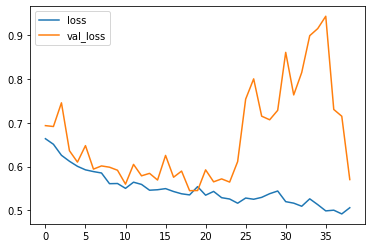

In [48]:
dl_hist.plot()

In [49]:
dl_hist.val_loss.min()

0.5449081659317017

In [50]:
preds_dl = model_dnn.predict(X_valid)
preds_dl[:10]

array([[0.79394203],
       [0.821594  ],
       [0.65790427],
       [0.57120574],
       [0.6973396 ],
       [0.75067073],
       [0.7462295 ],
       [0.8244981 ],
       [0.69577587],
       [0.72093487]], dtype=float32)

In [51]:
X_valid.head()

,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
752,2,9,4,6,1136,4,5,4,3,1,3,4,32,3,3,2,3,2,1,1
283,2,21,3,0,2353,1,3,1,1,1,4,2,47,3,2,2,3,1,1,1
990,1,18,2,6,750,1,1,4,2,1,1,1,27,3,2,1,1,1,1,1
821,1,36,3,6,6887,1,3,4,3,1,3,2,29,2,2,1,3,1,2,1
404,4,18,2,3,4594,1,2,3,3,1,2,3,32,3,2,1,3,1,2,1


In [52]:
y_valid.head(10)

752    0
283    1
990    0
821    0
404    1
23     1
140    1
678    1
282    1
176    1
Name: Creditability, dtype: int64

In [53]:
data.loc[X_valid.index]

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
752,0,2,9,4,6,1136,4,5,4,3,...,3,4,32,3,3,2,3,2,1,1
283,1,2,21,3,0,2353,1,3,1,1,...,4,2,47,3,2,2,3,1,1,1
990,0,1,18,2,6,750,1,1,4,2,...,1,1,27,3,2,1,1,1,1,1
821,0,1,36,3,6,6887,1,3,4,3,...,3,2,29,2,2,1,3,1,2,1
404,1,4,18,2,3,4594,1,2,3,3,...,2,3,32,3,2,1,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1,4,12,2,3,1963,1,4,4,3,...,2,3,31,3,1,2,4,2,2,1
651,1,2,6,2,3,368,5,5,4,3,...,4,2,38,3,2,1,3,1,1,1
196,1,4,6,4,0,6761,1,4,1,3,...,3,4,45,3,2,2,4,2,2,1
975,0,1,30,2,5,11998,1,2,1,1,...,1,4,34,1,2,1,2,1,2,1


In [54]:
# DNN Accuracy
# dl_acc = metrics.accuracy_score(y_valid, preds_dl)
# print(dl_acc)

In [55]:
tr_pdl = []
for elem in preds_dl:
    
    if elem >= 0.5:
        elem = 1
        tr_pdl.append(elem)
#         print(elem)
    else:
        elem = 0
        tr_pdl.append(elem)
#         print(elem)

In [56]:
print(tr_pdl)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]


In [57]:
print('Deep Neural Networks Accuracy')
dl_acc = metrics.accuracy_score(y_valid, tr_pdl)
dl_acc

Deep Neural Networks Accuracy


0.74

# Using Scaled Data

In [58]:
# from mlextend.preprocessing import minmax_scaling

In [59]:
min_ = X_train.min(axis = 0)
max_ = X_train.max(axis = 0)
min_

Account_Balance                        1
Duration_of_Credit_monthly             4
Payment_Status_of_Previous_Credit      0
Purpose                                0
Credit_Amount                        250
Value_Savings_Stocks                   1
Length_of_current_employment           1
Instalment_per_cent                    1
Sex_Marital_Status                     1
Guarantors                             1
Duration_in_Current_address            1
Most_valuable_available_asset          1
Age_years                             19
Concurrent_Credits                     1
Type_of_apartment                      1
No_of_Credits_at_this_Bank             1
Occupation                             1
No_of_dependents                       1
Telephone                              1
Foreign_Worker                         1
dtype: int64

In [60]:
max_

Account_Balance                          4
Duration_of_Credit_monthly              72
Payment_Status_of_Previous_Credit        4
Purpose                                 10
Credit_Amount                        18424
Value_Savings_Stocks                     5
Length_of_current_employment             5
Instalment_per_cent                      4
Sex_Marital_Status                       4
Guarantors                               3
Duration_in_Current_address              4
Most_valuable_available_asset            4
Age_years                               75
Concurrent_Credits                       3
Type_of_apartment                        3
No_of_Credits_at_this_Bank               4
Occupation                               4
No_of_dependents                         2
Telephone                                2
Foreign_Worker                           2
dtype: int64

In [61]:
sc_train = (X_train - min_) / (max_ - min_)
sc_train

,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
560,1.000000,0.235294,1.00,0.0,0.178002,1.0,0.25,0.333333,0.000000,0.0,1.000000,0.000000,0.446429,1.0,0.5,0.333333,0.666667,0.0,1.0,0.0
246,1.000000,0.205882,1.00,0.3,0.085287,0.0,0.50,1.000000,0.666667,0.0,0.333333,0.666667,0.089286,1.0,0.5,0.333333,0.666667,0.0,0.0,0.0
924,0.000000,0.250000,0.75,0.6,0.174095,0.0,0.25,0.333333,0.666667,0.0,0.000000,0.333333,0.125000,0.5,0.5,0.333333,0.666667,0.0,0.0,0.0
917,0.333333,0.117647,0.00,0.2,0.149609,0.0,0.25,1.000000,0.333333,0.0,0.666667,0.333333,0.107143,1.0,0.0,0.333333,0.666667,0.0,0.0,0.0
570,0.666667,0.117647,0.50,0.0,0.059426,0.0,0.25,1.000000,0.666667,0.0,0.000000,0.000000,0.125000,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,0.333333,0.470588,1.00,0.1,0.305381,0.0,0.50,0.666667,0.666667,0.0,1.000000,0.666667,0.267857,1.0,0.5,0.333333,0.666667,0.0,1.0,0.0
24,0.000000,0.029412,1.00,0.0,0.245736,1.0,0.25,0.000000,0.666667,0.0,0.666667,0.000000,0.446429,1.0,0.5,0.333333,0.333333,1.0,0.0,0.0
386,0.333333,0.073529,0.50,0.2,0.036756,0.0,0.50,1.000000,0.333333,0.0,0.000000,0.333333,0.196429,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0
277,0.333333,0.250000,1.00,0.9,0.187190,0.0,0.75,0.333333,0.666667,0.0,0.666667,0.333333,0.142857,1.0,0.5,0.333333,0.666667,0.0,0.0,0.0


In [62]:
sc_valid = (X_valid - min_) / (max_ - min_)
sc_valid.head()

,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
752,0.333333,0.073529,1.00,0.6,0.048751,0.75,1.00,1.000000,0.666667,0.0,0.666667,1.000000,0.232143,1.0,1.0,0.333333,0.666667,1.0,0.0,0.0
283,0.333333,0.250000,0.75,0.0,0.115715,0.00,0.50,0.000000,0.000000,0.0,1.000000,0.333333,0.500000,1.0,0.5,0.333333,0.666667,0.0,0.0,0.0
990,0.000000,0.205882,0.50,0.6,0.027512,0.00,0.00,1.000000,0.333333,0.0,0.000000,0.000000,0.142857,1.0,0.5,0.000000,0.000000,0.0,0.0,0.0
821,0.000000,0.470588,0.75,0.6,0.365192,0.00,0.50,1.000000,0.666667,0.0,0.666667,0.333333,0.178571,0.5,0.5,0.000000,0.666667,0.0,1.0,0.0
404,1.000000,0.205882,0.50,0.3,0.239023,0.00,0.25,0.666667,0.666667,0.0,0.333333,0.666667,0.232143,1.0,0.5,0.000000,0.666667,0.0,1.0,0.0


In [63]:
model_nn2 = Sequential([
    layers.Dense(224, activation = 'relu', input_shape = [20]),
    layers.BatchNormalization(),
    layers.Dense(224, activation = 'relu'),
    layers.Dense(224, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model_nn2.compile(optimizer = 'adam', loss = 'binary_crossentropy')

early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001, 
    patience = 20,
    restore_best_weights = True
)

model_dl2 = model_nn2.fit(sc_train, y_train,
                      validation_data = (sc_valid, y_valid),
                      batch_size = 128,
                      epochs = 1000,
                      callbacks = [early_stopping]
                    )

Epoch 1/1000
7/7 [==============================] - 0s 53ms/step - loss: 0.6213 - val_loss: 0.5788
Epoch 2/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.4670 - val_loss: 0.5667
Epoch 3/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.4193 - val_loss: 0.5543
Epoch 4/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.3798 - val_loss: 0.5611
Epoch 5/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.3571 - val_loss: 0.5576
Epoch 6/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.3240 - val_loss: 0.5509
Epoch 7/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.2920 - val_loss: 0.5498
Epoch 8/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.2687 - val_loss: 0.5459
Epoch 9/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.2439 - val_loss: 0.5405
Epoch 10/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.2214 - val_loss: 0.5440
Epoch 11/1000


In [64]:
preds_dl2 = model_nn2.predict(sc_valid)

In [65]:
tr_dl2 = []
for elem in preds_dl2:
    
    if elem >= 0.5:
        elem = 1
        tr_dl2.append(elem)
#         print(elem)
    else:
        elem = 0
        tr_dl2.append(elem)
#         print(elem)

In [66]:
print('Deep Neural Networks Accuracy')
dl2_acc = metrics.accuracy_score(y_valid, tr_dl2)
dl2_acc

Deep Neural Networks Accuracy


0.775

In [67]:
# Classical models

knn2 = KNeighborsClassifier()
knn2.fit(sc_train, y_train)

k2_preds = knn2.predict(sc_valid)

# Acc
k2_acc = metrics.accuracy_score(y_valid, k2_preds)
print('K2 Accuracy')
k2_acc

K2 Accuracy


0.75

In [68]:
dt2 = DecisionTreeClassifier()
dt2.fit(sc_train, y_train)

dt2_preds = dt2.predict(sc_valid)

# Acc
dt2_acc = metrics.accuracy_score(y_valid, dt2_preds)
print('dt2 Accuracy')
dt2_acc

dt2 Accuracy


0.7

In [69]:
svc2 = SVC()
svc2.fit(sc_train, y_train)

svc2_preds = svc2.predict(sc_valid)

# Acc
svc2_acc = metrics.accuracy_score(y_valid, svc2_preds)
print('svc2 Accuracy')
svc2_acc

svc2 Accuracy


0.805

In [70]:
rf2 = RandomForestClassifier()
rf2.fit(sc_train, y_train)

rf2_preds = rf2.predict(sc_valid)

# Acc
rf2_acc = metrics.accuracy_score(y_valid, rf2_preds)
print('rf2 Accuracy')
rf2_acc

rf2 Accuracy


0.765

In [71]:
lr2 = LogisticRegression()
lr2.fit(sc_train, y_train)

lr2_preds = lr2.predict(sc_valid)

# Acc
lr2_acc = metrics.accuracy_score(y_valid, lr2_preds)
print('lr2 Accuracy')
lr2_acc

lr2 Accuracy


0.78